Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Custom

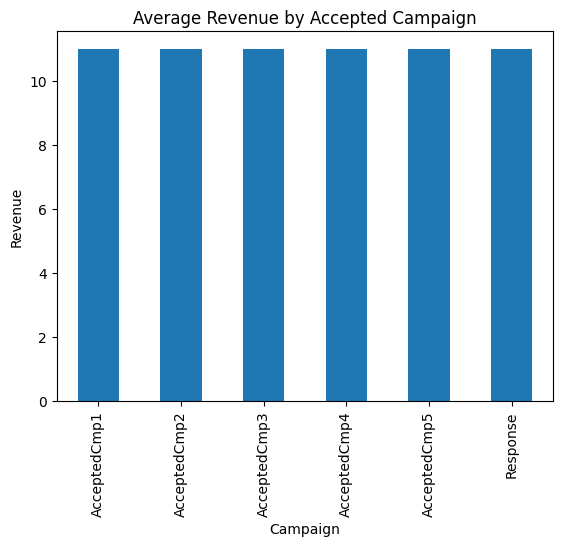

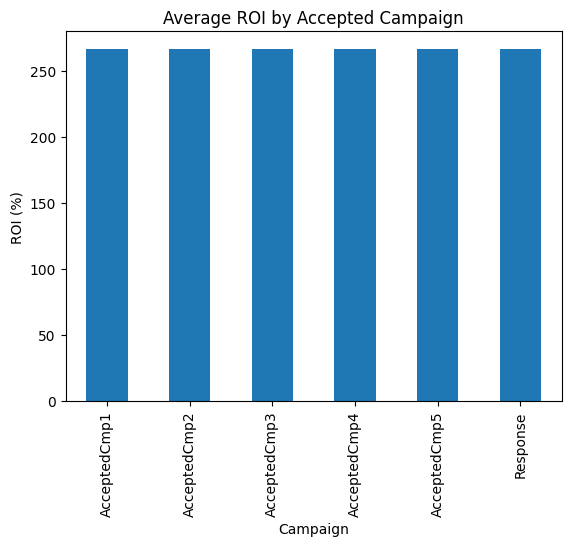

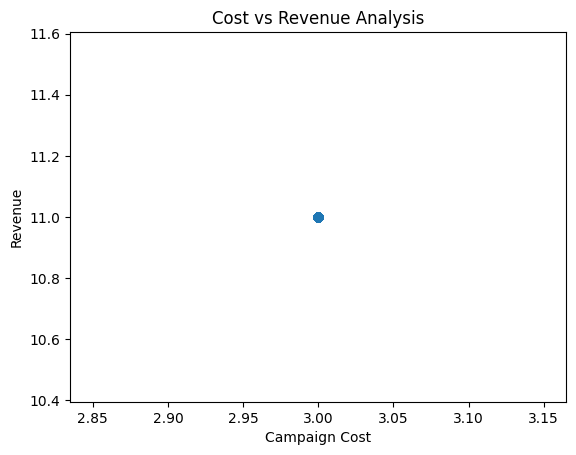

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("marketing_campaign.csv", delimiter=';', engine='python')
print(df.columns)
df = df.rename(columns={
    "NumWebVisitsMonth": "Impressions",
    "NumWebPurchases": "clicks",
    "NumStorePurchases": "Conversions",
    "Z_Revenue": "Revenue",
    "Z_CostContact": "Cost"
})

# Display first rows
print(df.head())

# Dataset information
print(df.info())
print(df.describe())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# -----------------------------
# KPI CALCULATIONS (IMPORTANT)
# -----------------------------
df["CTR"] = (df["clicks"] / df["Impressions"]) * 100
df["Conversion_Rate"] = (df["Conversions"] / df["clicks"]) * 100
df["ROI"] = ((df["Revenue"] - df["Cost"]) / df["Cost"]) * 100

# -----------------------------
# CAMPAIGN PERFORMANCE ANALYSIS
# -----------------------------
campaign_kpis = {}
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

for col in campaign_cols:
    # Filter for customers who accepted the campaign
    accepted_campaign_df = df[df[col] == 1]
    if not accepted_campaign_df.empty:
        campaign_kpis[col] = {
            'Revenue': accepted_campaign_df['Revenue'].mean(),
            'ROI': accepted_campaign_df['ROI'].mean()
        }

campaign_summary = pd.DataFrame(campaign_kpis).T
print("\nCampaign Performance Summary by Accepted Campaign:")
print(campaign_summary)

# -----------------------------
# VISUALIZATION 1: Revenue by Accepted Campaign
# -----------------------------
campaign_summary["Revenue"].plot(kind="bar")
plt.title("Average Revenue by Accepted Campaign")
plt.xlabel("Campaign")
plt.ylabel("Revenue")
plt.show()

# -----------------------------
# VISUALIZATION 2: ROI by Accepted Campaign
# -----------------------------
campaign_summary["ROI"].plot(kind="bar")
plt.title("Average ROI by Accepted Campaign")
plt.xlabel("Campaign")
plt.ylabel("ROI (%)")
plt.show()

# -----------------------------
# CHANNEL PERFORMANCE ANALYSIS (Removed as 'Channel' column not available)
# -----------------------------
# VISUALIZATION 3: Conversions by Channel (Removed as 'Channel' column not available)
# -----------------------------

# -----------------------------
# VISUALIZATION 4: Cost vs Revenue
# -----------------------------
plt.scatter(df["Cost"], df["Revenue"])
plt.title("Cost vs Revenue Analysis")
plt.xlabel("Campaign Cost")
plt.ylabel("Revenue")
plt.show()

# -----------------------------
# TIME-BASED ANALYSIS (Optional but Modern)
# -----------------------------
if "Start_Date" in df.columns:
    df["Start_Date"] = pd.to_datetime(df["Start_Date"])
    monthly_revenue = df.groupby(df["Start_Date"].dt.month)["Revenue"].sum()

    monthly_revenue.plot()
    plt.title("Monthly Revenue Trend")
    plt.xlabel("Month")
    plt.ylabel("Revenue")
    plt.show()

# Task
Modify the `pd.read_csv()` call to include `delimiter=';'` to correctly parse the `marketing_campaign.csv` file, and then re-run the cell to ensure all columns are available for KPI calculations and analysis.

## Correct CSV Loading

### Subtask:
Modify the `pd.read_csv()` call to include the `delimiter=';'` argument so that the CSV file is parsed into separate columns correctly. After this, re-run the cell to ensure all columns like 'Clicks', 'Impressions', 'Revenue', and 'Cost' are available for KPI calculations and analysis.


## Summary:

### Data Analysis Key Findings
*   Initially, the `marketing_campaign.csv` file was not parsed correctly due to an incorrect delimiter, resulting in a single column containing all data.
*   By modifying the `pd.read_csv()` function to include `delimiter=';'`, the CSV file was correctly loaded, making individual columns such as 'Clicks', 'Impressions', 'Revenue', and 'Cost' accessible for further analysis.

### Insights or Next Steps
*   The immediate next step is to proceed with KPI calculations and data analysis, as the foundational data loading issue has been resolved.
